In [9]:

!pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline



In [3]:
df = pd.read_csv("rainfall in india 1901-2015.csv")
df.head()


SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716.7  
2   1874.0    690.6  
3   1977.6    571.0  
4   1624.9    630.8

In [19]:
df = pd.read_csv("rainfall in india 1901-2015.csv")

# Quick peek
display(df.head())
print(df.shape)
print(df.info())
print(df.describe())

# Missing / duplicates
print("Missing values per column:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

# Unique subdivisions and years
print("Number of subdivisions:", df['SUBDIVISION'].nunique())
print("Years in dataset:", df['YEAR'].unique()[:10], "...")


SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716.7  
2   1874.0    690.6  
3   1977.6    571.0  
4   1624.9    630.8

(4116, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64


In [20]:
# Fill numeric NaNs with column mean
df = df.fillna(df.mean(numeric_only=True))

# If there are non-numeric NaNs left, check them
print(df.isnull().any())


SUBDIVISION    False
YEAR           False
JAN            False
FEB            False
MAR            False
APR            False
MAY            False
JUN            False
JUL            False
AUG            False
SEP            False
OCT            False
NOV            False
DEC            False
ANNUAL         False
Jan-Feb        False
Mar-May        False
Jun-Sep        False
Oct-Dec        False
dtype: bool


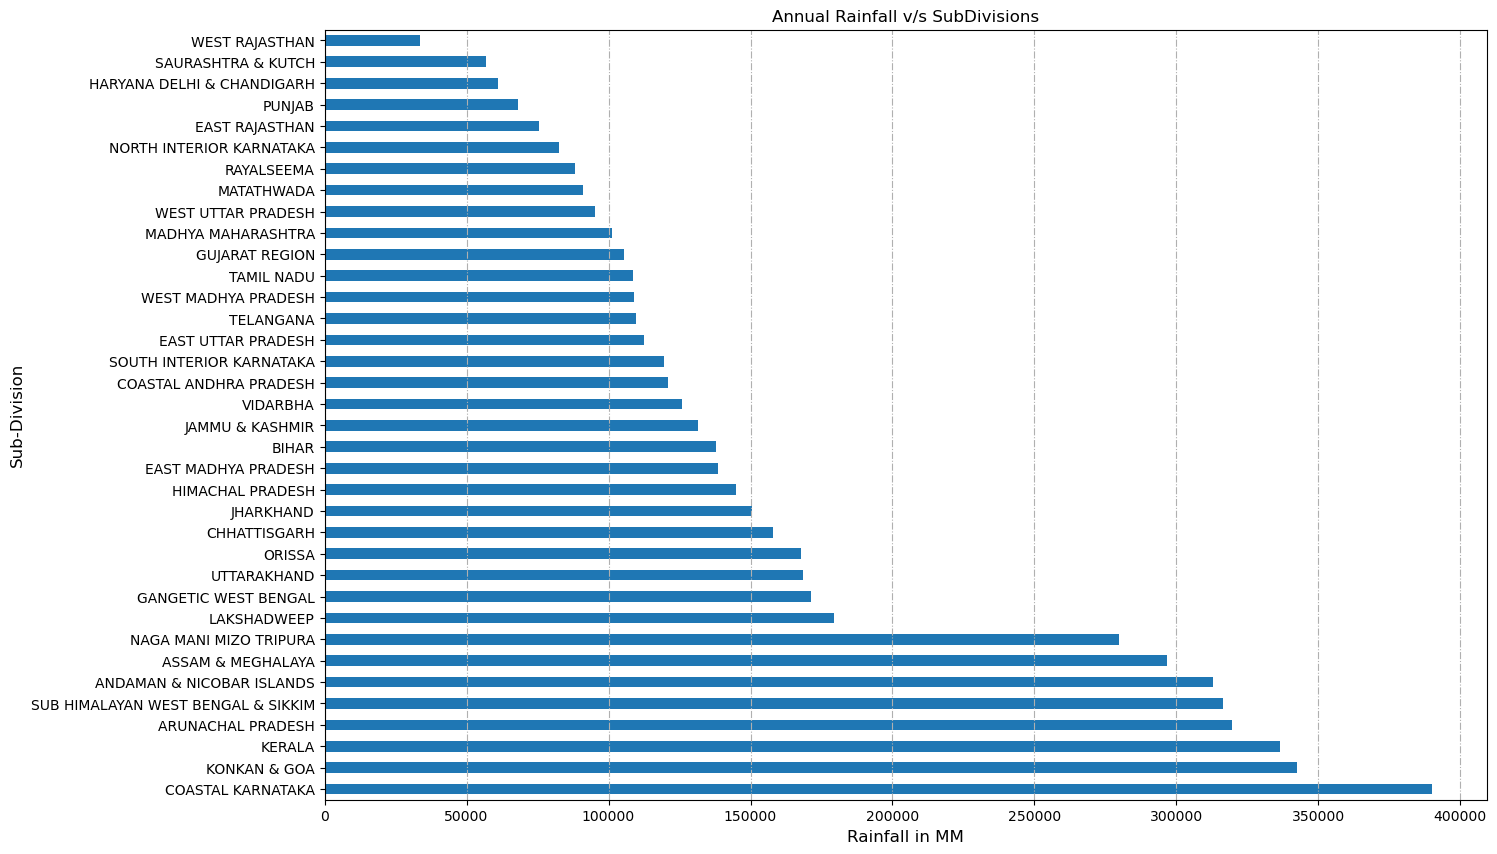

<Figure size 1800x800 with 0 Axes>

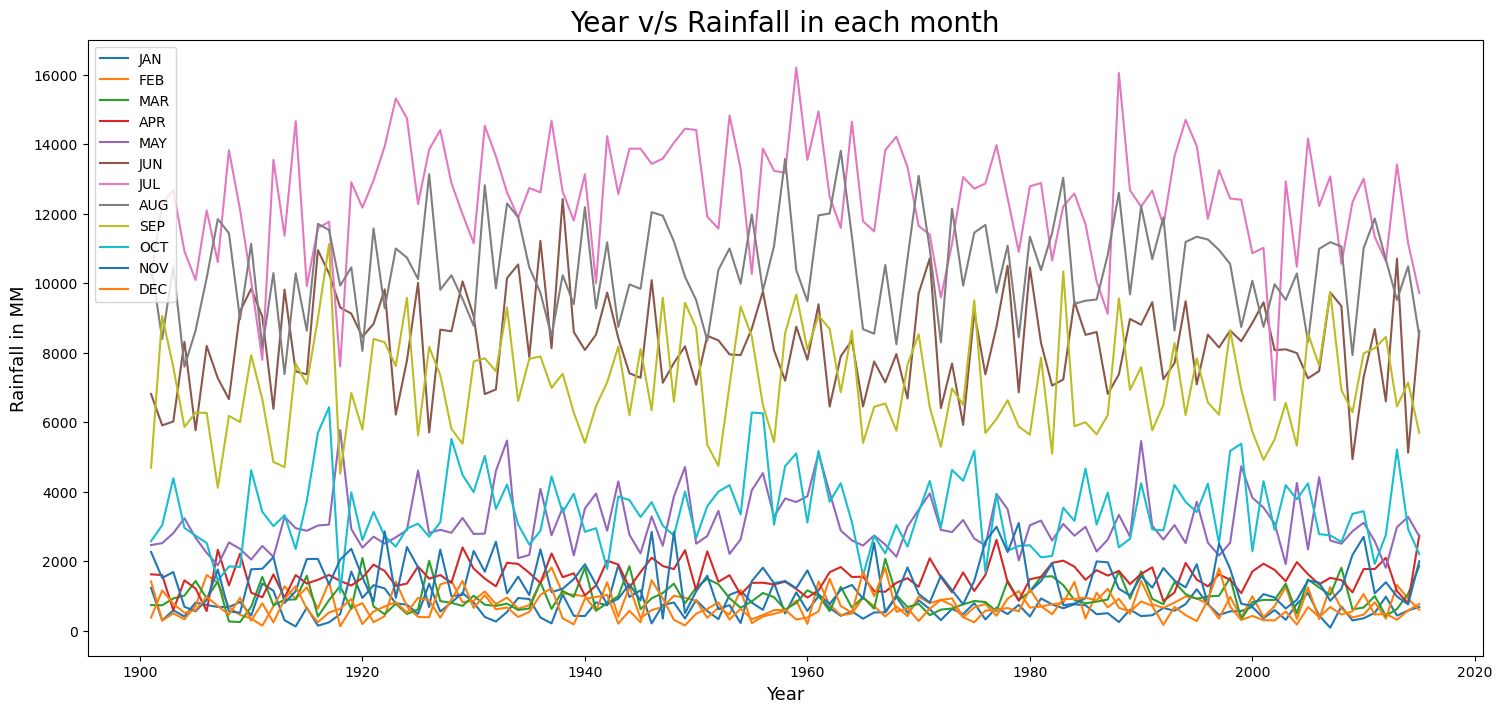

In [21]:
# Annual rainfall by subdivision (sum)
plt.figure(figsize=(15,10))
df.groupby("SUBDIVISION")['ANNUAL'].sum().sort_values(ascending=False).plot(kind='barh')
plt.xlabel("Rainfall in MM", size=12)
plt.ylabel("Sub-Division", size=12)
plt.title("Annual Rainfall v/s SubDivisions")
plt.grid(axis="x", linestyle="-.")
plt.show()

# Year vs monthly rainfall (sum across subdivisions)
months = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
plt.figure(figsize=(18,8))
df.groupby('YEAR')[months].sum().plot(kind='line', figsize=(18,8))
plt.xlabel("Year", size=13)
plt.ylabel("Rainfall in MM", size=13)
plt.title("Year v/s Rainfall in each month", size=20)
plt.show()


<Figure size 1000x700 with 0 Axes>

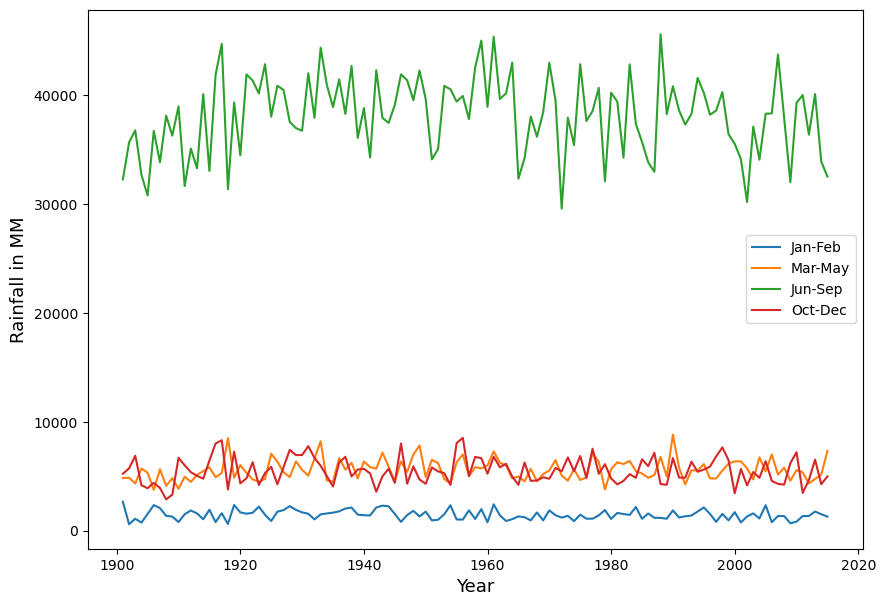

In [22]:
# If dataset has 'Jan-Feb','Mar-May','Jun-Sep','Oct-Dec' columns, plot them:
season_cols = [c for c in df.columns if c in ['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']]
if season_cols:
    plt.figure(figsize=(10,7))
    df.groupby('YEAR')[season_cols].sum().plot(figsize=(10,7))
    plt.xlabel("Year", size=13)
    plt.ylabel("Rainfall in MM", size=13)
    plt.show()
else:
    print("Season columns not found; skipping seasonal plot.")


SUBDIVISION  YEAR   JAN   FEB   MAR   APR   MAY    JUN    JUL    AUG  \
3197   TELANGANA  1901   6.9  41.8   7.8  45.2  22.0  123.6  237.8  177.2   
3198   TELANGANA  1902   0.0   0.0   0.2  10.7   7.3   52.4  146.3  142.8   
3199   TELANGANA  1903  12.9   4.6   0.0   9.9  40.7   99.2  505.2  246.7   
3200   TELANGANA  1904   0.0   0.0  10.8   0.8  14.7  104.2  139.5   50.0   
3201   TELANGANA  1905   0.0   4.3  12.8  27.6  32.2  129.5   82.4  237.3   

        SEP    OCT   NOV  DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
3197   77.7   75.5  12.2  0.0   827.7     48.7     75.0    616.4     87.7  
3198  190.5   41.7  31.2  7.3   630.4      0.0     18.2    532.0     80.2  
3199  191.9  155.8  15.5  1.1  1283.4     17.5     50.5   1042.9    172.4  
3200  162.3   44.4   0.0  0.0   526.7      0.0     26.3    456.0     44.4  
3201  179.1   19.6   0.0  0.0   724.9      4.3     72.6    628.4     19.6

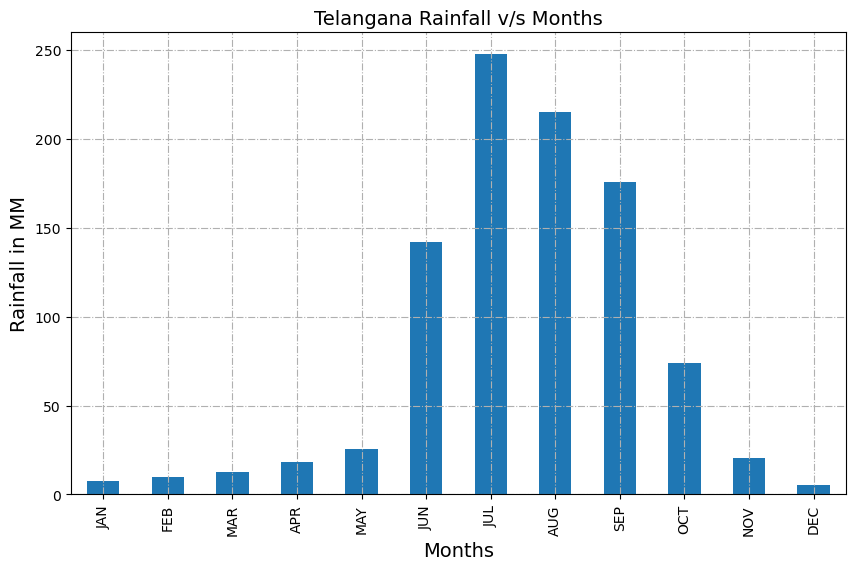

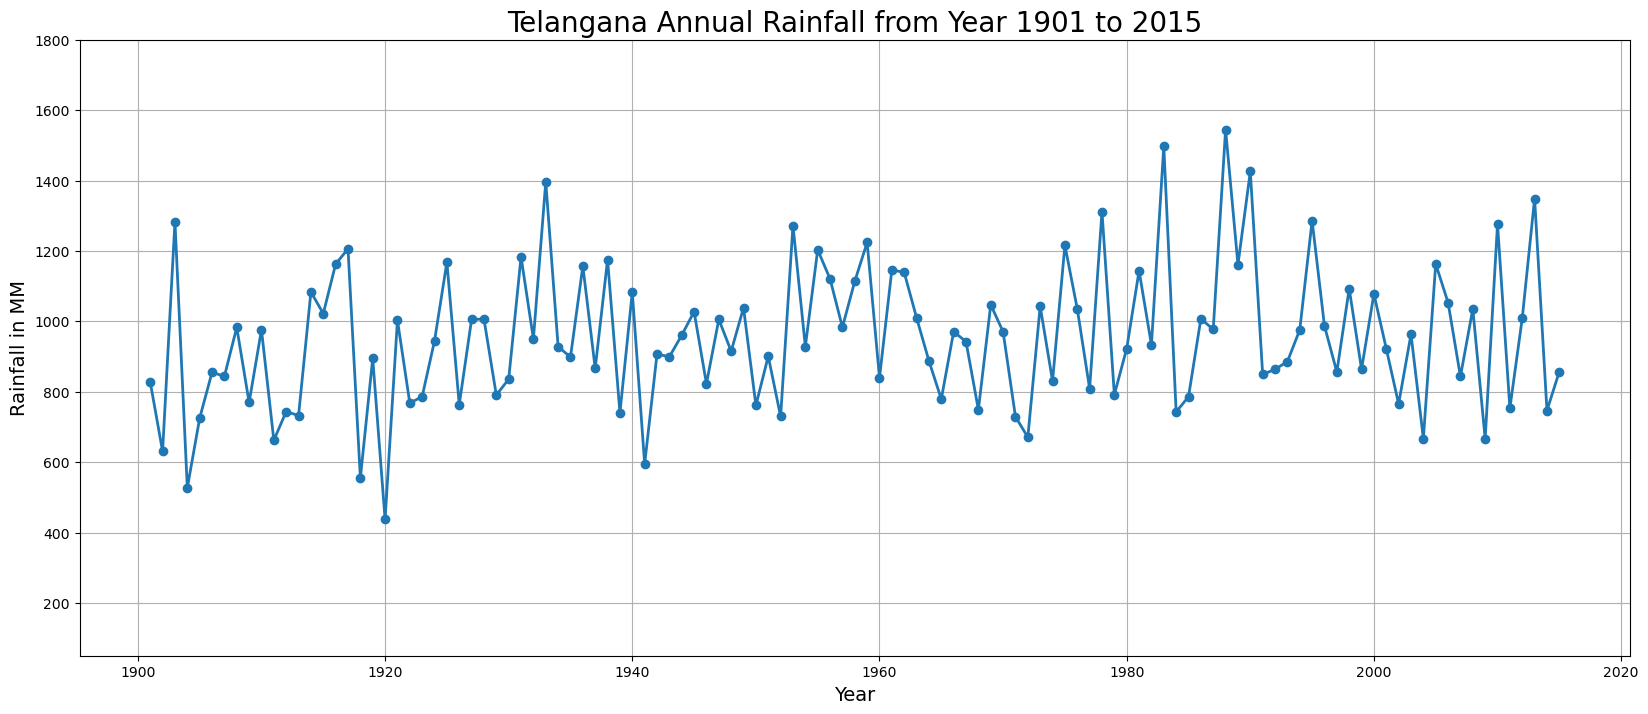

In [23]:
T = df.loc[df['SUBDIVISION'] == 'TELANGANA'].copy()
display(T.head())

# Mean monthly rainfall (bar)
plt.figure(figsize=(10,6))
T[months].mean().plot(kind='bar', width=0.5, linewidth=2)
plt.title("Telangana Rainfall v/s Months", size=14)
plt.xlabel("Months", size=14)
plt.ylabel("Rainfall in MM", size=14)
plt.grid(axis="both", linestyle="-.")
plt.show()

# Annual rainfall trend
plt.figure(figsize=(20,8))
T.groupby("YEAR")['ANNUAL'].sum().plot(ylim=(50, 1800), marker='o', linestyle='-', linewidth=2)
plt.xlabel('Year', size=14)
plt.ylabel('Rainfall in MM', size=14)
plt.title('Telangana Annual Rainfall from Year 1901 to 2015', size=20)
plt.grid()
plt.show()


In [24]:
# Pick a subdivision for monthly prediction (you used VIDARBHA)
group = df.groupby('SUBDIVISION')[['YEAR'] + months]
vidarbha_df = group.get_group('VIDARBHA').copy()

# Melt months into rows: long format
df2 = vidarbha_df.melt(id_vars=['YEAR'], value_vars=months, var_name='Month', value_name='Avg_Rainfall').reset_index(drop=True)

# Map month names to numbers
month_map = {'JAN':1,'FEB':2,'MAR':3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12}
df2['Month'] = df2['Month'].map(month_map)

display(df2.head(12))


YEAR  Month  Avg_Rainfall
0   1901      1          36.8
1   1902      1           1.6
2   1903      1           5.2
3   1904      1           4.3
4   1905      1           7.3
5   1906      1          12.9
6   1907      1           3.6
7   1908      1           4.1
8   1909      1           1.3
9   1910      1           0.0
10  1911      1          18.2
11  1912      1           0.6

In [25]:
# Features and target (use Year and Month to predict Avg_Rainfall)
X = df2[['YEAR','Month']].astype(int).values
y = df2['Avg_Rainfall'].astype(float).values  # float is fine for regression

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [27]:
# Random Forest baseline (no scaling required)
rf_model = RandomForestRegressor(max_depth=100, max_features='sqrt',
                                 min_samples_leaf=4, min_samples_split=10,
                                 n_estimators=800, random_state=42)

# Use KFold for regression cross-validation
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# SVM hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}
grid_search_svm = GridSearchCV(SVR(), param_grid_svm, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svm.fit(X_train_scaled, y_train)
best_svm = grid_search_svm.best_estimator_
print("Best SVM params:", grid_search_svm.best_params_)

# KNN hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)
best_knn = grid_search_knn.best_estimator_
print("Best KNN params:", grid_search_knn.best_params_)


Best SVM params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best KNN params: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


In [28]:
models = {
    "Random Forest": rf_model,
    "SVM": best_svm,
    "KNN": best_knn
}

results = {}

for name, model in models.items():
    print(f"\n----- {name} -----")
    # Choose scaled or unscaled inputs
    if name in ["SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_test_pred = model.predict(X_test_scaled)
        y_train_pred = model.predict(X_train_scaled)
        train_score = model.score(X_train_scaled, y_train)
        test_score = model.score(X_test_scaled, y_test)
    else:
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)

    # Metrics
    print("------- Test Data -------")
    print('MAE:', mean_absolute_error(y_test, y_test_pred))
    print('MSE:', mean_squared_error(y_test, y_test_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

    print("\n------- Train Data -------")
    print('MAE:', mean_absolute_error(y_train, y_train_pred))
    print('MSE:', mean_squared_error(y_train, y_train_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))

    print("\nTraining R^2:", round(train_score, 3)*100)
    print("Testing R^2:", round(test_score, 3)*100)

    results[name] = {"Training R2 (%)": round(train_score, 3)*100,
                     "Testing R2 (%)": round(test_score, 3)*100}

print("\n----- Summary of Results -----")
for model_name, metrics_dict in results.items():
    print(f"{model_name}: {metrics_dict}")



----- Random Forest -----
------- Test Data -------
MAE: 34.515464718495565
MSE: 2759.356107341101
RMSE: 52.5295736451487

------- Train Data -------
MAE: 29.020696242674635
MSE: 2108.311626347353
RMSE: 45.91635467180897

Training R^2: 86.8
Testing R^2: 80.60000000000001

----- SVM -----
------- Test Data -------
MAE: 50.614780587420334
MSE: 5710.423347443234
RMSE: 75.56734312812138

------- Train Data -------
MAE: 53.053199075734014
MSE: 6628.50595993818
RMSE: 81.41563707260529

Training R^2: 58.5
Testing R^2: 59.9

----- KNN -----
------- Test Data -------
MAE: 31.97834138486312
MSE: 2529.436281087851
RMSE: 50.29350138027627

------- Train Data -------
MAE: 31.084057971014495
MSE: 2486.867910404366
RMSE: 49.8685061978436

Training R^2: 84.39999999999999
Testing R^2: 82.19999999999999

----- Summary of Results -----
Random Forest: {'Training R2 (%)': 86.8, 'Testing R2 (%)': 80.60000000000001}
SVM: {'Training R2 (%)': 58.5, 'Testing R2 (%)': 59.9}
KNN: {'Training R2 (%)': 84.399999999

In [30]:
# 1) If you want reproducible plots and experiments:
np.random.seed(42)

# 2) If you prefer pipelines:
from sklearn.pipeline import Pipeline
pipe_knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_neighbors=5))])

# 3) If you want feature engineering: consider adding Year^2, Month*sin/cos to capture seasonality
df2['Year2'] = df2['YEAR']**2
df2['Month_sin'] = np.sin(2 * np.pi * df2['Month'] / 12)
df2['Month_cos'] = np.cos(2 * np.pi * df2['Month'] / 12)
display(df2.head())


YEAR  Month  Avg_Rainfall    Year2  Month_sin  Month_cos
0  1901      1          36.8  3613801        0.5   0.866025
1  1902      1           1.6  3617604        0.5   0.866025
2  1903      1           5.2  3621409        0.5   0.866025
3  1904      1           4.3  3625216        0.5   0.866025
4  1905      1           7.3  3629025        0.5   0.866025